In [1]:
# import environment
import gym
env = gym.make('gym_cliffwalking:cliffwalking-v0')
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
n_states = 48
gamma = 0.75# dicount factor
alpha = 0.03 #learning rate
n_epocs = 1000
NEU = np.zeros(n_epocs)
Lamb = [0,0.3,0.5,0.7,1]# Lambda for TD(lambda)
#Lamb = [0]
state = env.reset()
V_state = np.zeros(n_states)

In [169]:
print(V_state)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [174]:

NEU_alllamb = []
for lamb in Lamb:
        NEU_fulllist = []
        #V_state = -4000*np.random.rand(n_states) # initiallize values to 0 value
        V_state = np.zeros(n_states) # initiallize values to 0 value
        for i_episode in range(n_epocs):

            state = env.reset() #ste initialization

            eligibility = np.zeros(n_states) # initiallize elegibility to 0 value
            TD_error = np.zeros(n_states) # initiallize elegibility to 0 value
            NEU_list = np.zeros(40)
            #V_state = np.zeros(n_states) 
            z = np.zeros(40)
            norm_cal = np.zeros(40)

            for t in range(40):

                #action = env.action_space.sample() # take an action
                action = np.random.randint(4) # take an action
                next_state, reward, done, info = env.step(action) # get reward and move to next

                # Compute TD error
                td_error = reward + gamma*V_state[next_state] - V_state[state]
                TD_error[t] = td_error

                # current state elegibility update

                eligibility[state] = eligibility[state] + 1.0 
                z[t] = eligibility[state]

                # Compute state values
                for k in range(n_states):
                    #eligibility[k] = eligibility[k]*lamb*gamma
                    V_state[k] = V_state[k] + alpha*td_error*eligibility[k] 
                    if lamb != 0:
                        eligibility[k] = eligibility[k]*lamb*gamma
                    else:
                        eligibility[k] = eligibility[k]

                state = next_state
                norm_cal[t] = np.square(td_error*z[t])

            NEU = np.sum(norm_cal)/40

            NEU_fulllist.append(NEU)
            
            NEU_avg1 = np.zeros(100)
            for i in range(100):
                NEU_avg1[i] = np.sum(NEU_fulllist[10*i:10*i+10])/10
        NEU_alllamb.append(NEU_avg1) 

Text(0, 0.5, 'NEU')

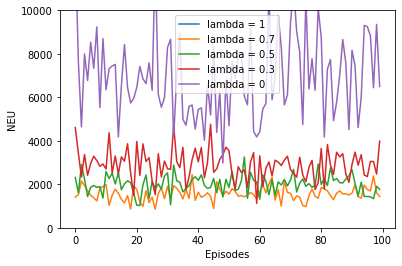

In [177]:
#np.size(NEU_alllamb)
plt.plot(NEU_alllamb[0],label = 'lambda = 1')
plt.plot(NEU_alllamb[1],label = 'lambda = 0.7')
plt.plot(NEU_alllamb[2],label = 'lambda = 0.5')
plt.plot(NEU_alllamb[3],label = 'lambda = 0.3')
plt.plot(NEU_alllamb[4],label = 'lambda = 0')
plt.legend()
#plt.xlim([0,80])
plt.ylim([0,0.1*1e5])
plt.xlabel('Episodes')
plt.ylabel('NEU')

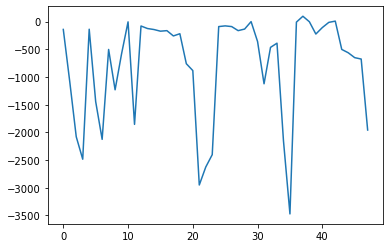

In [83]:
plt.plot(V_state)

In [100]:
print(new_state)

0


In [99]:
print(reward)

-100.0


In [ ]:
print(is_done)

In [ ]:
print(info)

In [98]:
new_state, reward, is_done, info = env.step(0)
env.render()

In [93]:
print(new_state)

0


In [94]:
print(reward)

-100.0


In [95]:
new_state, reward, is_done, info = env.step(1)
new_state, reward, is_done, info = env.step(2)
env.render()

In [96]:
print(new_state)
print(reward)
print(is_done)

0
-1.0
False


In [97]:
new_state, reward, is_done, info = env.step(0)
for _ in range(12):
    env.step(1)
new_state, reward, is_done, info = env.step(2)
env.render()